<a href="https://colab.research.google.com/github/abdulmajee/AdminBSBMaterialDesign/blob/master/Majeed1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

## Helper **libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

print out the version

In [47]:
print(tf.__version__)
print(np.__version__)

1.14.0
1.16.4


Import MNIST DATASET from MNIST

In [0]:
mnist = tf.keras.datasets.mnist

from MNIST dataset we can import specific dataset. We shall import fashion_mnist dataset


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [51]:
train_images.shape

(60000, 28, 28)

In [52]:
len(train_labels)

60000

In [53]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [54]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [55]:
len(test_labels)


10000

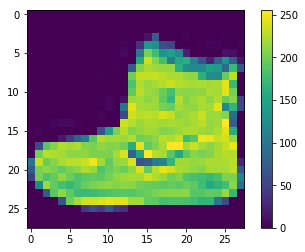

In [56]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

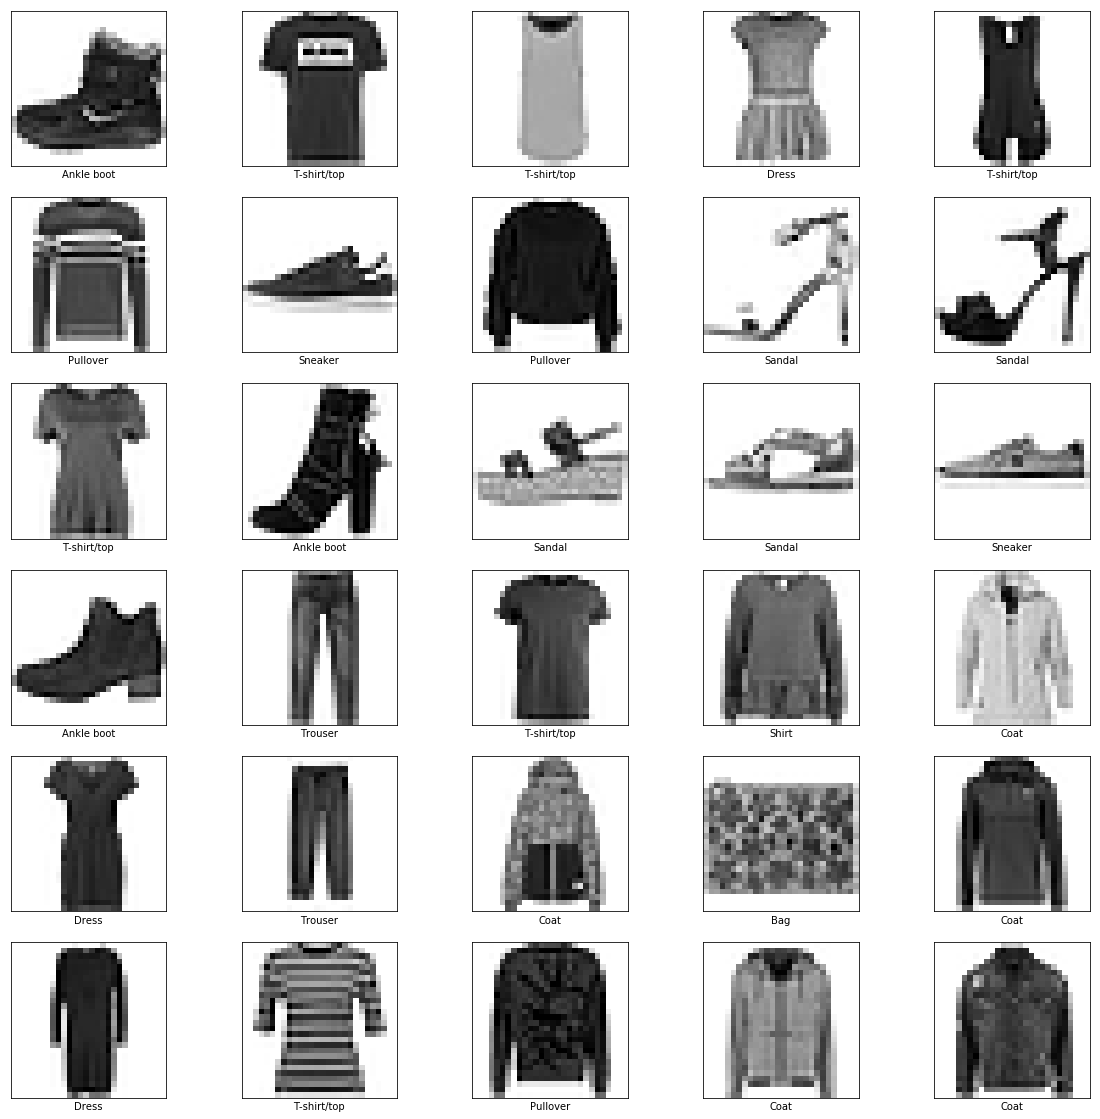

In [58]:
plt.figure(figsize=(20,20))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


W0827 10:13:52.547385 139800021677952 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [61]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5092 - acc: 0.8216
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3781 - acc: 0.8631
Epoch 3/5
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3346 - acc: 0.8802
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3134 - acc: 0.8846
Epoch 5/5
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2976 - acc: 0.8905


In [62]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.3558 - acc: 0.8722
Test accuracy: 0.8722


In [0]:
predictions = model.predict(test_images)

In [64]:
predictions[0]

array([1.4120854e-05, 3.5124220e-08, 4.1174212e-06, 8.8983462e-08,
       4.0839515e-07, 5.0222306e-03, 4.9192213e-06, 9.8891467e-02,
       1.0673420e-03, 8.9499527e-01], dtype=float32)

In [65]:
np.argmax(predictions[0])

9

In [66]:
test_labels[0]

9

In [67]:
class_names[9]

'Ankle boot'

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

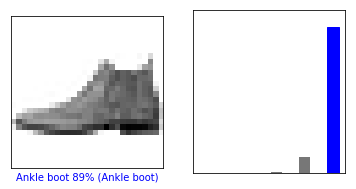

In [69]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

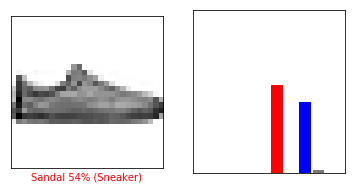

In [70]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

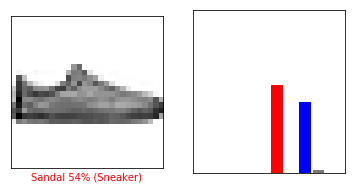

In [71]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

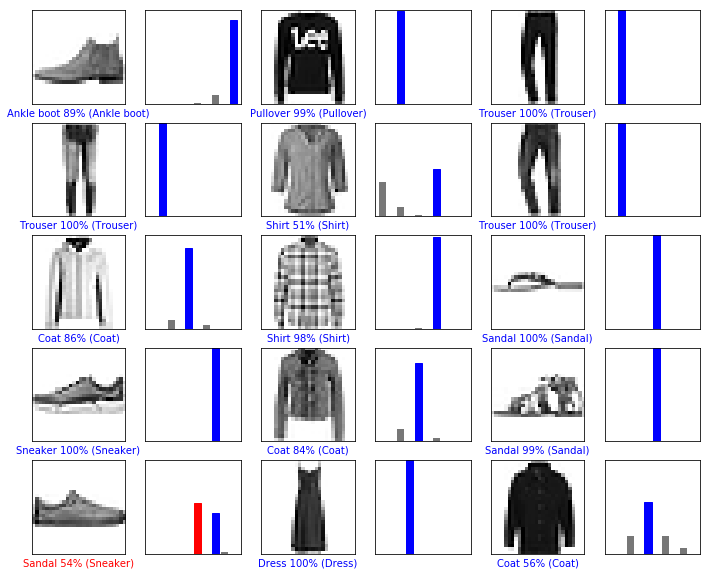

In [72]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [104]:
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

In [105]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [106]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2521008e-04 3.0702673e-11 9.9421591e-01 8.1979940e-10 3.3890828e-03
  2.2070326e-10 1.9693773e-03 2.3963291e-13 5.1737419e-07 1.9769583e-12]]


In [107]:
np.argmax(predictions_single)

2

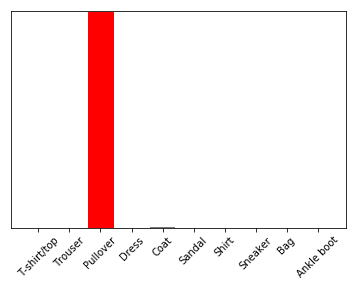

In [108]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [109]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)

2
